In [108]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from bs4 import BeautifulSoup

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Step 1: Fetch the web page
url = 'https://flashresults.ncaa.com/Outdoor/2024/FirstRounds/West/008-1-01.htm'
response = requests.get(url)
html_content = response.text

In [5]:
# Step 2: Parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')

In [10]:
# Step 3: Find the table
# You can find the table by looking for the <table> tag, or by its id or class if it's specified
table = soup.find('table', {'id':'splits'})  # Adjust this to be more specific if needed, e.g., soup.find('table', {'id': 'table_id'})

In [12]:
# Step 4: Extract rows and columns
rows = table.find_all('tr')

# Extract headers
headers = [header.text.strip() for header in rows[0].find_all('th')]

# Extract data rows
data = []
for row in rows[1:]:
    columns = row.find_all('td')
    data.append([column.text.strip() for column in columns])

In [97]:
# Step 5: Convert to DataFrame
df = pd.DataFrame(data, columns=headers)

# Print the DataFrame
df.head()

,Pl,Pos,,Athlete,Time,400m,800m,1200m,1600m,2000m,...,6400m,6800m,7200m,7600m,8000m,8400m,8800m,9200m,9600m,10000m
0,1,2,,Habtom SAMUELNew Mexico [FR],28:26.91 Q PB,1:05.63[1:05.63],2:17.63[1:12.01],3:28.66[1:11.03],4:40.86[1:12.21],5:54.11[1:13.26],...,18:30.11[1:07.64],19:39.36[1:09.26],20:48.94[1:09.58],21:55.85[1:06.92],23:01.87[1:06.02],24:07.89[1:06.03],25:15.63[1:07.74],26:23.05[1:07.43],27:28.03[1:04.98],28:26.91[58.88]
1,2,9,,Denis KIPNGETICHOklahoma State [FR],28:27.68 Q,1:07.29[1:07.29],2:19.26[1:11.98],3:31.35[1:12.10],4:42.29[1:10.94],5:54.60[1:12.32],...,18:29.58[1:06.41],19:38.45[1:08.87],20:48.16[1:09.72],21:55.13[1:06.98],23:01.18[1:06.05],24:08.35[1:07.18],25:16.53[1:08.18],26:23.03[1:06.51],27:28.57[1:05.55],28:27.68[59.11]
2,3,10,,Patrick KIPROPArkansas [SR],28:29.47 Q,1:07.14[1:07.14],2:18.76[1:11.62],3:30.04[1:11.29],4:41.79[1:11.75],5:54.31[1:12.53],...,18:30.04[1:07.93],19:39.59[1:09.55],20:48.31[1:08.73],21:54.99[1:06.69],23:02.12[1:07.13],24:07.74[1:05.63],25:17.05[1:09.31],26:22.99[1:05.95],27:28.81[1:05.82],28:29.47[1:00.67]
3,4,8,,Chandler GIBBENSKansas [SR],28:33.36 Q,1:05.46[1:05.46],2:19.30[1:13.84],3:30.82[1:11.53],4:42.36[1:11.54],5:54.39[1:12.04],...,18:31.02[1:07.94],19:39.90[1:08.88],20:48.59[1:08.70],21:54.91[1:06.33],23:02.33[1:07.42],24:08.30[1:05.98],25:16.43[1:08.14],26:23.80[1:07.37],27:28.42[1:04.63],28:33.36[1:04.94]
4,5,1,,Ernest CHERUIYOTTexas Tech [FR],28:35.03 Q,1:05.65[1:05.65],2:18.36[1:12.71],3:30.05[1:11.69],4:41.61[1:11.57],5:53.79[1:12.19],...,18:30.69[1:08.10],19:39.05[1:08.36],20:47.89[1:08.85],21:54.91[1:07.02],23:01.32[1:06.42],24:08.13[1:06.82],25:16.86[1:08.73],26:24.12[1:07.27],27:29.36[1:05.24],28:35.03[1:05.67]


In [100]:
df = df.replace(r'^\s*$', np.nan, regex=True)

/var/folders/hw/k51wqqw93751fx50t4_d520c0000gn/T/ipykernel_34891/2450314316.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(r'^\s*$', np.nan, regex=True)


In [102]:
# Function to split and clean columns
def split_and_clean_column(df, column_name, delimiter="["):
    # Split the column into two new columns
    new_cols = df[column_name].str.split(delimiter, expand=True)
    
    # Remove the delimiter from the resulting columns
    new_cols = new_cols.map(lambda x: x.replace(']', '') if isinstance(x, str) else x)
    
    # Rename new columns and concatenate them with the original DataFrame
    df[[f"{column_name}_tot", f"{column_name}_split"]] = new_cols
    return df

# Apply the function to columns containing '00m'
columns_to_split = [col for col in df.columns if '00m' in col]

for col in columns_to_split:
    df = split_and_clean_column(df, col)

# Drop original columns if desired
df.drop(columns=columns_to_split, inplace=True)

In [103]:
df['Time'] = df['Time'].apply(lambda x: x[:8])

In [104]:
# Define the regular expression pattern
pattern = r'^(\w+)\s([A-Z]+)'

# Extract the first name and last name
df['Athlete'] = df['Athlete'].str.extract(pattern).apply(' '.join, axis=1).str.title()

In [105]:
# Identify columns containing '00m'
columns_to_rank = [col for col in df.columns if '00m_tot' in col]

# Create new columns with ranks
for col in columns_to_rank:
    df[f'{col}_rank'] = df[col].rank(method='min', na_option='bottom', ascending=True)

In [106]:
df.head()

,Pl,Pos,,Athlete,Time,400m_tot,400m_split,800m_tot,800m_split,1200m_tot,...,6400m_tot_rank,6800m_tot_rank,7200m_tot_rank,7600m_tot_rank,8000m_tot_rank,8400m_tot_rank,8800m_tot_rank,9200m_tot_rank,9600m_tot_rank,10000m_tot_rank
0,1,2,NaN,Habtom Samueln,28:26.91,1:05.63,1:05.63,2:17.63,1:12.01,3:28.66,...,3.0,4.0,10.0,7.0,4.0,3.0,1.0,3.0,1.0,1.0
1,2,9,NaN,Denis Kipngeticho,28:27.68,1:07.29,1:07.29,2:19.26,1:11.98,3:31.35,...,1.0,1.0,5.0,5.0,1.0,6.0,3.0,2.0,3.0,2.0
2,3,10,NaN,Patrick Kipropa,28:29.47,1:07.14,1:07.14,2:18.76,1:11.62,3:30.04,...,2.0,5.0,7.0,4.0,5.0,2.0,5.0,1.0,4.0,3.0
3,4,8,NaN,Chandler Gibbensk,28:33.36,1:05.46,1:05.46,2:19.30,1:13.84,3:30.82,...,6.0,8.0,8.0,2.0,7.0,5.0,2.0,4.0,2.0,4.0
4,5,1,NaN,Ernest Cheruiyott,28:35.03,1:05.65,1:05.65,2:18.36,1:12.71,3:30.05,...,4.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0


In [111]:
# Select only athlete name and rank columns
rank_columns = df.loc[:, df.columns.str.contains('rank|Athlete', case=False)]

In [123]:
rank_columns.head(12)

,Athlete,400m_tot_rank,800m_tot_rank,1200m_tot_rank,1600m_tot_rank,2000m_tot_rank,2400m_tot_rank,2800m_tot_rank,3200m_tot_rank,3600m_tot_rank,...,6400m_tot_rank,6800m_tot_rank,7200m_tot_rank,7600m_tot_rank,8000m_tot_rank,8400m_tot_rank,8800m_tot_rank,9200m_tot_rank,9600m_tot_rank,10000m_tot_rank
0,Habtom Samueln,2.0,2.0,1.0,3.0,8.0,5.0,1.0,2.0,2.0,...,3.0,4.0,10.0,7.0,4.0,3.0,1.0,3.0,1.0,1.0
1,Denis Kipngeticho,21.0,13.0,19.0,15.0,18.0,20.0,2.0,4.0,1.0,...,1.0,1.0,5.0,5.0,1.0,6.0,3.0,2.0,3.0,2.0
2,Patrick Kipropa,18.0,9.0,5.0,8.0,15.0,2.0,11.0,6.0,8.0,...,2.0,5.0,7.0,4.0,5.0,2.0,5.0,1.0,4.0,3.0
3,Chandler Gibbensk,1.0,14.0,14.0,16.0,16.0,17.0,21.0,8.0,14.0,...,6.0,8.0,8.0,2.0,7.0,5.0,2.0,4.0,2.0,4.0
4,Ernest Cheruiyott,3.0,5.0,6.0,6.0,4.0,7.0,8.0,3.0,7.0,...,4.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0
5,Kirami Yegoa,8.0,3.0,4.0,2.0,3.0,4.0,4.0,9.0,9.0,...,5.0,2.0,4.0,8.0,9.0,9.0,9.0,6.0,6.0,6.0
6,Aaron Las,12.0,23.0,10.0,9.0,7.0,7.0,10.0,11.0,13.0,...,8.0,5.0,2.0,6.0,6.0,7.0,8.0,7.0,7.0,7.0
7,Cael Grotenhuisn,9.0,10.0,12.0,12.0,8.0,14.0,12.0,15.0,11.0,...,10.0,10.0,6.0,9.0,8.0,8.0,7.0,8.0,8.0,8.0
8,Sanele Masondoi,20.0,15.0,16.0,30.0,33.0,31.0,34.0,29.0,20.0,...,8.0,11.0,9.0,10.0,10.0,11.0,11.0,11.0,11.0,9.0
9,Adisu Guadiao,34.0,44.0,36.0,31.0,28.0,36.0,38.0,25.0,19.0,...,7.0,9.0,1.0,1.0,3.0,1.0,6.0,9.0,9.0,10.0


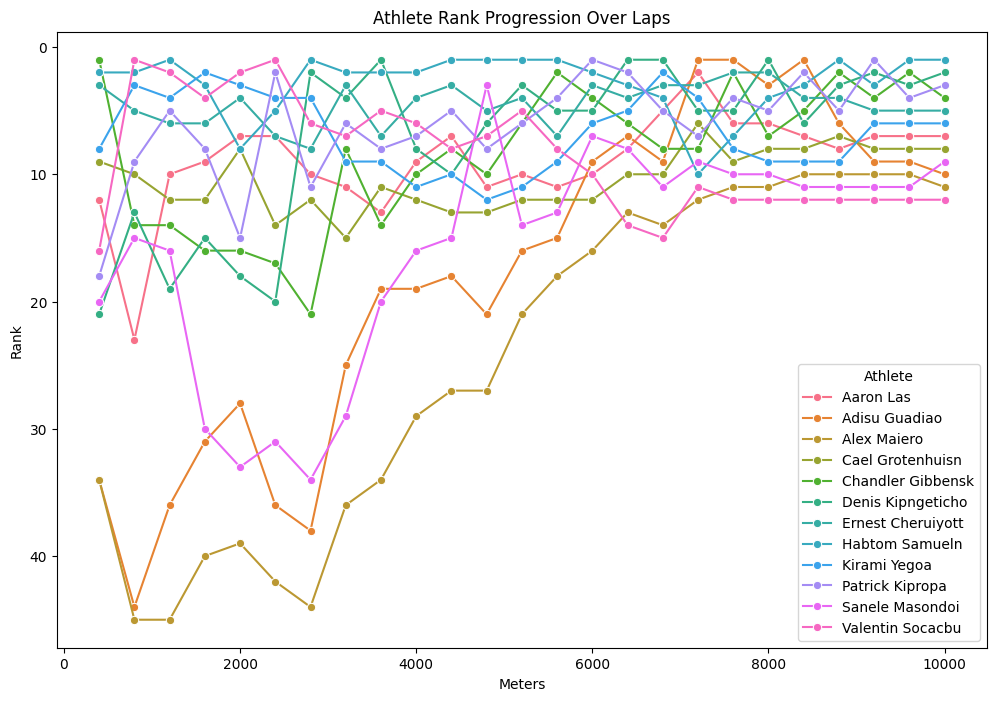

In [125]:
# Melt the DataFrame to long format for easier plotting
df_melted = rank_columns.head(12).melt(id_vars='Athlete', var_name='meters', value_name='rank')

# Sort the DataFrame by athlete and lap
df_melted['meters'] = df_melted['meters'].str.extract('(\d+)').astype(int)
df_melted = df_melted.sort_values(['Athlete', 'meters'])

# Set up the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='meters', y='rank', hue='Athlete', marker='o')

# Customizing the plot
plt.gca().invert_yaxis()  # Invert y-axis to show 1st rank at the top
plt.xlabel('Meters')
plt.ylabel('Rank')
plt.title('Athlete Rank Progression Over Laps')
plt.legend(title='Athlete')

# Show the plot
plt.show()

In [126]:
df_melted.head()

,Athlete,meters,rank
6,Aaron Las,400,12.0
18,Aaron Las,800,23.0
30,Aaron Las,1200,10.0
42,Aaron Las,1600,9.0
54,Aaron Las,2000,7.0


In [132]:
df_melted['top_12'] = df_melted['rank'].apply(lambda row: (row <= 12))

In [134]:
top_12_perc = df_melted.groupby('meters')['top_12'].mean() * 100

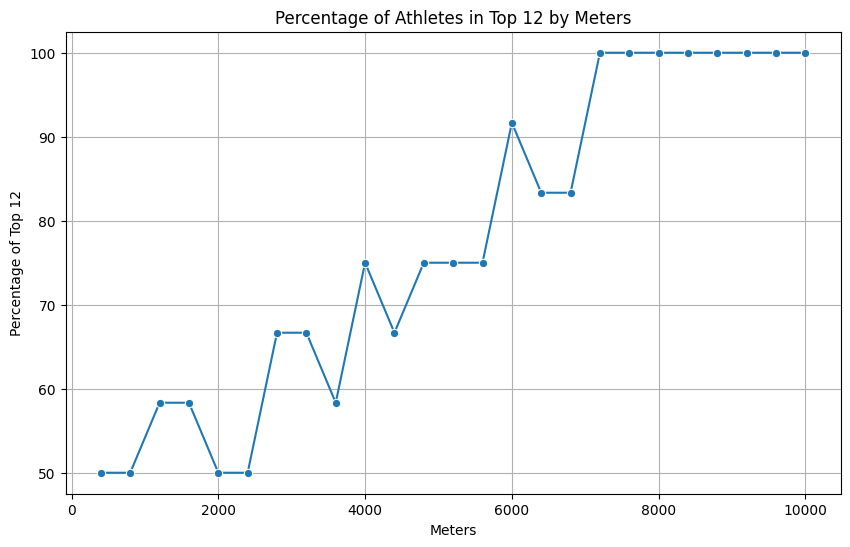

In [136]:
# Convert the result to a DataFrame for plotting
top_12_df = top_12_perc.reset_index()
top_12_df.columns = ['meters', 'percent_top_12']

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_12_df, x='meters', y='percent_top_12', marker='o')

# Customizing the plot
plt.xlabel('Meters')
plt.ylabel('Percentage of Top 12')
plt.title('Percentage of Athletes in Top 12 by Meters')
plt.grid(True)

# Show the plot
plt.show()